In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# From local helper files
from helper_evaluation import set_all_seeds, set_deterministic
from helper_train_2 import train_model, train_model_train
from helper_plotting import plot_training_loss, plot_accuracy, show_examples
from helper_dataset import get_dataloaders_mnist

In [ ]:
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
train_loader, valid_loader, test_loader = get_dataloaders_mnist(
    batch_size=128,
    validation_fraction=0.1)

# Checking the dataset
for images, labels in train_loader:
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

Image batch dimensions: torch.Size([128, 1, 28, 28])
Image label dimensions: torch.Size([128])
Class labels of 10 examples: tensor([3, 2, 2, 7, 1, 4, 9, 0, 9, 6])


In [ ]:
class MultilayerPerceptron(torch.nn.Module):

    def __init__(self, num_features, num_classes,
                 num_hidden_1, num_hidden_2, num_hidden_3, num_hidden_4):
        super().__init__()

        self.my_network = torch.nn.Sequential(
            # 1st hidden layer
            torch.nn.Flatten(),
            torch.nn.Linear(num_features, num_hidden_1),
            torch.nn.ReLU(),
            # 2nd hidden layer
            torch.nn.Linear(num_hidden_1, num_hidden_2),
            torch.nn.ReLU(),
            # 3rd hidden layer
            torch.nn.Linear(num_hidden_2, num_hidden_3),
            torch.nn.ReLU(),
            # 4th hidden layer
            torch.nn.Linear(num_hidden_3, num_hidden_4),
            torch.nn.ReLU(),
            # output layer
            torch.nn.Linear(num_hidden_4, num_classes),
        )

        for m in self.modules():
            if isinstance(m, torch.nn.Linear):
                torch.nn.init.kaiming_uniform_(m.weight, mode='fan_in', nonlinearity='relu')
                if m.bias is not None:
                    m.bias.detach().zero_()

    def forward(self, x):
        logits = self.my_network(x)
        return logits

In [ ]:
model = MultilayerPerceptron(28 * 28, 10, 512, 256, 128, 64)

In [ ]:
initial_model_weights = []
for m in model.modules():
  if isinstance(m, torch.nn.Linear):
    initial_model_weights.append(m.weight.detach().numpy())

## 1) Kaiming Ha initialisation is best for this model because, we are using ReLU as the activation functions and Ha intialisation is best for such cases.

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [ ]:
minibatch_loss_list, train_acc_list, valid_acc_list = train_model(model, 50, train_loader, valid_loader, test_loader,  optimizer, DEVICE)

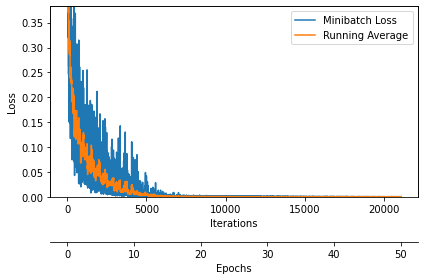

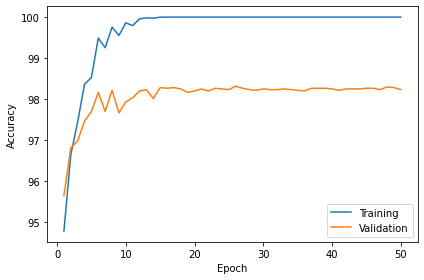

In [ ]:
plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=50,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.show()










In [ ]:
import seaborn as sns

In [ ]:
final_model_weights = []
for m in model.modules():
  if isinstance(m, torch.nn.Linear):
    final_model_weights.append(m.weight.detach().numpy())

In [ ]:
len(final_model_weights)

5

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

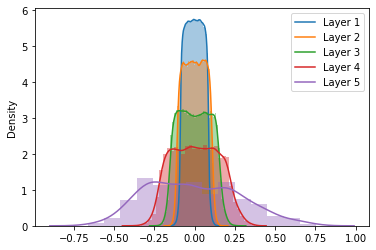

In [ ]:
for i in range(5):
  sns.distplot(initial_model_weights[i])
plt.legend(labels=['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5'])







/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

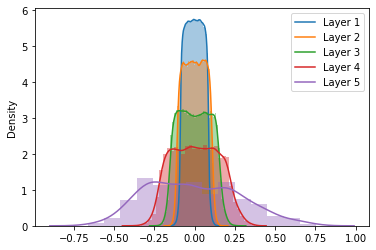

In [ ]:
for i in range(5):
  sns.distplot(final_model_weights[i])
plt.legend(labels=['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5'])

## Even though we have He initialisation, the weights distribution are similar as that of initial distribution.


## Without initialisation

In [ ]:
class MultilayerPerceptronWithot(torch.nn.Module):

    def __init__(self, num_features, num_classes,
                 num_hidden_1, num_hidden_2, num_hidden_3, num_hidden_4):
        super().__init__()

        self.my_network = torch.nn.Sequential(
            # 1st hidden layer
            torch.nn.Flatten(),
            torch.nn.Linear(num_features, num_hidden_1),
            torch.nn.ReLU(),
            # 2nd hidden layer
            torch.nn.Linear(num_hidden_1, num_hidden_2),
            torch.nn.ReLU(),
            # 3rd hidden layer
            torch.nn.Linear(num_hidden_2, num_hidden_3),
            torch.nn.ReLU(),
            # 4th hidden layer
            torch.nn.Linear(num_hidden_3, num_hidden_4),
            torch.nn.ReLU(),
            # output layer
            torch.nn.Linear(num_hidden_4, num_classes),
        )

        for m in self.modules():
            if isinstance(m, torch.nn.Linear):
                m.weight.detach().normal_(0, 0.001)
                if m.bias is not None:
                    m.bias.detach().zero_()

    def forward(self, x):
        logits = self.my_network(x)
        return logits

In [ ]:
modelWithot = MultilayerPerceptronWithot(28 * 28, 10, 512, 256, 128, 64)

In [ ]:
initial_model_weights_w = []
for m in modelWithot.modules():
  if isinstance(m, torch.nn.Linear):
    initial_model_weights_w.append(m.weight.detach().numpy())

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [ ]:
minibatch_loss_list_w, train_acc_list_w, valid_acc_list_w = train_model(modelWithot, 15, train_loader, valid_loader, test_loader,  optimizer, DEVICE)

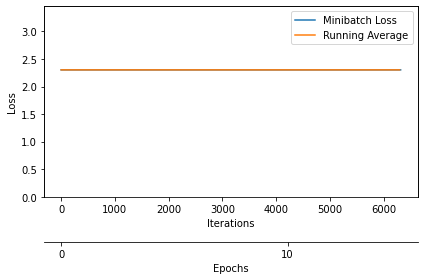

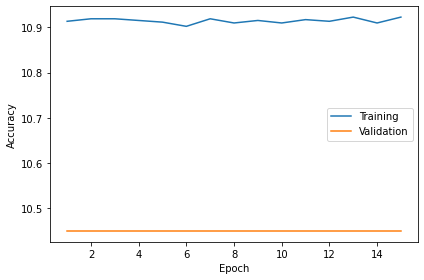

In [ ]:
plot_training_loss(minibatch_loss_list=minibatch_loss_list_w,
                   num_epochs=50,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)
plt.show()

plot_accuracy(train_acc_list=train_acc_list_w,
              valid_acc_list=valid_acc_list_w,
              results_dir=None)
plt.show()

In [ ]:
final_model_weights_w = []
for m in modelWithot.modules():
  if isinstance(m, torch.nn.Linear):
    final_model_weights_w.append(m.weight.detach().numpy())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

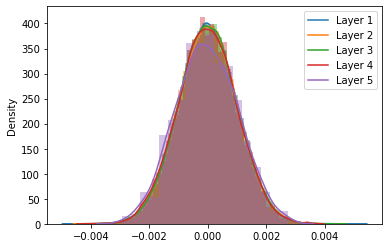

In [ ]:
for i in range(5):
  sns.distplot(initial_model_weights_w[i])
plt.legend(labels=['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

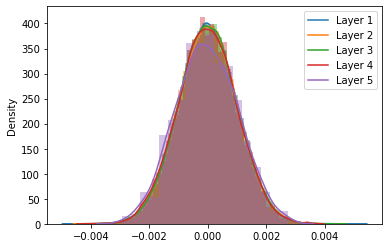

In [ ]:
for i in range(5):
  sns.distplot(final_model_weights_w[i])
plt.legend(labels=['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5'])






















## If we don't use He initialisation and do a normal distribution, the training and test accuracies are very low close to 10% and the model is not able to train with these weights and the distributiona as well is same as that of un initialised weights. One of the reasons that could be causing this issue in vanishing gradient descent

## With He initialisation the model trainined very well and in just 15 epochs whereas in normally distributed weights, it was not able to train at all. As stated above it could be because of vanishing gradients.